# k-means et images

On va utiliser l'algorithme des $k$-means pour réduire le nombre de couleurs d'une image.

Pour travailler avec des images en python, on a coutume utiliser la bibliothèque [pillow](https://pillow.readthedocs.io/en/stable/). Elle est normalement installée par défaut dans anaconda. 

Nous allons l'utiliser via [matplotlib](https://matplotlib.org/3.3.3/tutorials/introductory/images.html).

## données images

In [4]:
import pandas

In [5]:
url = "https://www.aefinfo.fr/assets/medias/documents/4/9/493038_prv.jpeg"
import urllib
import PIL.Image
image = PIL.Image.open(urllib.request.urlopen(url))

In [6]:
import numpy as np

img = np.array(image)

In [7]:
type(img)

numpy.ndarray

In [8]:
# une couleur de pixel 
img[3, 4]

array([174, 217, 200], dtype=uint8)

In [9]:
# une ligne 
img[12]

array([[184, 217, 234],
       [184, 217, 234],
       [184, 217, 234],
       ...,
       [ 67,  71,  70],
       [ 67,  71,  70],
       [ 67,  71,  70]], dtype=uint8)

In [10]:
# une colonne

img[:, 23]

array([[199, 224, 194],
       [198, 223, 193],
       [197, 222, 193],
       ...,
       [163, 165, 190],
       [164, 166, 191],
       [158, 160, 185]], dtype=uint8)

### créer une image

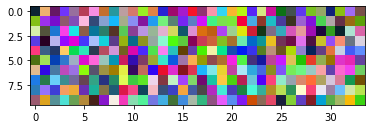

In [13]:
import random
import numpy
from matplotlib.pyplot import imshow

mon_image = []

for i in range(10):
    ligne = []
    for j in range(34):
        ligne.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])
    mon_image.append(ligne)
    
mon_image = numpy.array(mon_image)
imshow(mon_image)

In [ ]:
type(mon_image)

### un dataframe

Nos données sont donc ici les différents pixels, donc des objets décrits par 3 variables entières. On va les ranger dans une dataframe.

On pourrait créer une dataframe initialement vide et y ajouter tous les pixels un à un, mais on va faire ça plus efficacement en : 

1. créant une liste de dataframe contenant chacun une ligne de pixels
3. concaténer ces dataframe en une seule.

In [ ]:
# la ligne 0
img[0]

In [ ]:
# la dataframe de la ligne 0

In [ ]:
pandas.DataFrame(data=img[0], 
             columns=["R", "G", "B"])

In [ ]:
# la liste de dataframes

liste_rows = []
for row in img:
    liste_rows.append(pandas.DataFrame(data=row, columns=["R", "G", "B"]))


In [ ]:
# on concat le tout en une dataframe :

data = pandas.concat(liste_rows)

data

In [ ]:
data.dtypes

Son nombre de ligne correspond au nombre de ligne * nombre de colonne de l'image initiale :

In [ ]:
img.shape[0] * img.shape[1]

## k-means

In [ ]:
from sklearn.cluster import KMeans

### un essai

Faites un $k$-means de votre nouveau dataframe en 10 classes, donc 10 nouvelles couleurs.

In [ ]:
kmeans = KMeans(n_clusters=10,
                n_init=10, 
                max_iter=300).fit(data)

Nos nouvelles couleurs vont être les centres de gravité :

In [ ]:
kmeans.cluster_centers_

Que l'on convertit en entier : 

In [ ]:
couleurs = kmeans.cluster_centers_.astype(int)

couleurs

Il nous reste maintenant à recolorier notre image en associant chaque pixel à sa nouvelle couleur.

Pour cela, on va 

1. créer une fonction qui calcule la distance euclidienne entre 2 couleirs
2. créer une fonction qui a partir d'une couleur quelconque lui associe la couleur choisie la plus proche
3. recréer une nouvelle image avec nos nouvelles couleurs

#### distance entre couleurs

Une fonction qui calcule la distance entre 2 couleurs. On utilise les fonctin de numpy pour faire ça vite :


In [ ]:
img[1, 2] 

In [ ]:
img[4, 5] 

In [ ]:
img[1, 2] - img[4, 5] 

In [ ]:
(img[1, 2] - img[4, 5] ) ** 2

In [ ]:
sum((img[1, 2] - img[4, 5] ) ** 2)

In [ ]:
def dist(couleur1, couleur2):
    return sum((couleur1 - couleur2)**2)

In [ ]:
dist(img[1, 2], img[4, 5])

#### meilleure couleur

Une fonction qui rend la couleur la plus proche parmis une liste de couleurs

In [ ]:
def choix(couleur, liste_couleur):
    meilleure_couleur = liste_couleur[0]
    
    for choix_couleur in liste_couleur:
        if dist(couleur, choix_couleur) < dist(couleur, meilleure_couleur):
            meilleure_couleur = choix_couleur
    
    return meilleure_couleur

In [ ]:
couleurs

In [ ]:
# coulurs comme une image d'1 ligne et 4 colonnes
imshow([couleurs])

In [ ]:
choix(img[1, 2], couleurs)

#### nouvelle image

In [ ]:
import numpy as np

In [ ]:
nouvelle_image = np.array([[choix(col, couleurs) for col in row] for row in img])

In [ ]:
imshow(nouvelle_image)

### détermination du nombre de classes

On essaie entre 1 à 20 couleurs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inertie = []

for nb in range(1, 20):
    print("calcul pour ", nb, "couleurs")
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

### avec le nombre de classe optimal

In [ ]:
kmeans = KMeans(n_clusters=6,
                n_init=10, 
                max_iter=300).fit(data)

In [ ]:
couleurs = kmeans.cluster_centers_.astype(int)

In [ ]:
imshow([couleurs])

In [ ]:
nouvelle_image = np.array([[choix(col, couleurs) for col in row] for row in img])

In [ ]:
imshow(nouvelle_image)

### En changeant les couleurs

On va associer à chacune de nos 5 nouvelles couleurs à la couleur la plus proche d'une palette de couleurs

In [ ]:
import seaborn as sns

current_palette = sns.color_palette()
sns.palplot(current_palette) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

**Attention** : si vous tapez `sns.set()`comme on le faisait habituellement, seaborn va changer la représentation par défaut des images et donc nos dessins seront moins joli.

Chaque couleur de la palette est codée par 3 réels entre 0 et 1.

Par exemple la 1ère couleur : 

In [ ]:
current_palette[0]

Nos couleurs sont codées par 3 entiers entre 0 et 255. 

Il faut donc recréer convertir les courleurs de seaborn dans jeu de coordonnées

In [ ]:
palette = []

for couleur in current_palette:
    conversion = (int(255 * couleur[0]), int(255 * couleur[1]), int(255 * couleur[2]))
    palette.append(conversion)

In [ ]:
palette

In [ ]:
imshow([palette])

On peut maintenant refaire notre image (on utilise bien notre nouvelle image qui n'a plus que 6 couleurs, par l'image d'origine) : 

In [ ]:
nouvelle_nouvelle_image = np.array([[choix(col, palette) for col in row] for row in nouvelle_image])

In [ ]:
imshow(nouvelle_nouvelle_image)

On peut faire plein de variations possibles. Laissez parler le data artiste qui est en vous :-)